In [6]:
#Q1
sesame <- read.csv("https://tinyurl.com/wlgl63b") #dataset
library(dplyr) #libraries
library(arm)


In [7]:
summary(sesame)
str(sesame)
sesame.df <- tbl_df(sesame)
sesame1 <- sesame


   post.test        pre.test       treatment  
 Min.   : 94.0   Min.   : 78.4   Min.   :0.0  
 1st Qu.:110.7   1st Qu.:104.2   1st Qu.:0.0  
 Median :113.9   Median :107.3   Median :0.5  
 Mean   :112.2   Mean   :105.8   Mean   :0.5  
 3rd Qu.:115.8   3rd Qu.:110.8   3rd Qu.:1.0  
 Max.   :122.0   Max.   :119.8   Max.   :1.0  

'data.frame':	42 obs. of  3 variables:
 $ post.test: num  116 117 107 105 114 ...
 $ pre.test : num  105.9 100.8 91.7 97.5 106.5 ...
 $ treatment: int  1 1 1 1 1 1 1 1 1 1 ...


In [8]:
head(sesame)
sesame.treat <- filter(sesame, sesame$treatment==1) #creating different datasets for training and test data
sesame1.treat <- filter(sesame, sesame$treatment==1)
summary(sesame.treat)
sesame.untreat <- filter(sesame, sesame$treatment ==0)
sesame1.untreat <- filter(sesame, sesame$treatment==1)


post.test,pre.test,treatment
116.2,105.9,1
116.9,100.8,1
106.9,91.7,1
104.6,97.5,1
114.2,106.5,1
113.6,107.4,1


   post.test        pre.test       treatment
 Min.   :104.6   Min.   : 91.7   Min.   :1  
 1st Qu.:111.5   1st Qu.:104.6   1st Qu.:1  
 Median :114.8   Median :107.2   Median :1  
 Mean   :114.1   Mean   :107.3   Mean   :1  
 3rd Qu.:116.2   3rd Qu.:110.6   3rd Qu.:1  
 Max.   :122.0   Max.   :119.8   Max.   :1  

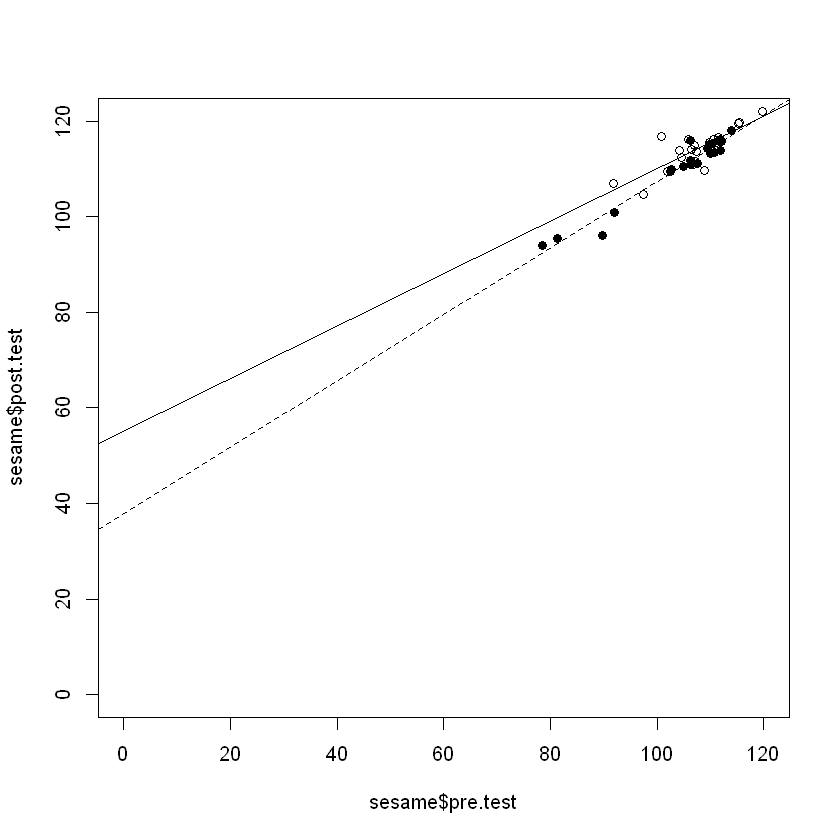

In [9]:
sesame.lm1 <- lm(sesame.treat$post.test~sesame.treat$pre.test, sesame) #regression on required parameters
sesame.lm2 <- lm(sesame.untreat$post.test~sesame.untreat$pre.test,sesame)
plot(sesame$pre.test,sesame$post.test,xlim = c(0,120),ylim = c(0,120), pch=ifelse(sesame$treatment==1,1,16)) #plot lines, pch denotes the color difference
abline(sesame.lm1) #both the regression lines, one is dashed which is the untreated group
abline(sesame.lm2, lty = 'dashed') 

post.test,pre.test,treatment
20.0,105.9,1
116.9,100.8,1
106.9,91.7,1
104.6,97.5,1
114.2,106.5,1
113.6,107.4,1
116.6,111.4,1
114.8,110.0,1
114.9,106.9,1
111.0,106.7,1


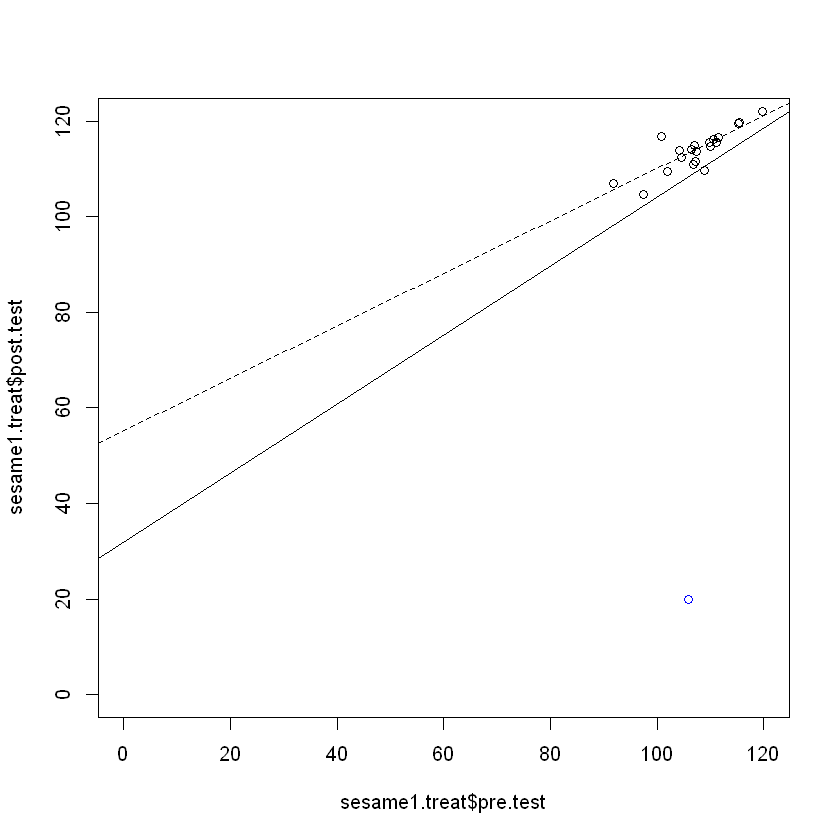

In [10]:
sesame1.treat$post.test[1] = 20 #changing one of the observations
sesame1.treat #same as last, but trendline is different
sesame.lm3 <- lm(sesame1.treat$post.test~sesame1.treat$pre.test, sesame1)
sesame.lm4 <- lm(sesame1.untreat$post.test~sesame1.untreat$pre.test,sesame1)
plot(sesame1.treat$pre.test,sesame1.treat$post.test,xlim = c(0,120),ylim = c(0,120), col = ifelse(sesame1.treat$post.test==20,"blue", "black"),pch=ifelse(sesame1$treatment==1,1,16))
abline(sesame.lm3)
abline(sesame.lm4, lty = 'dashed')


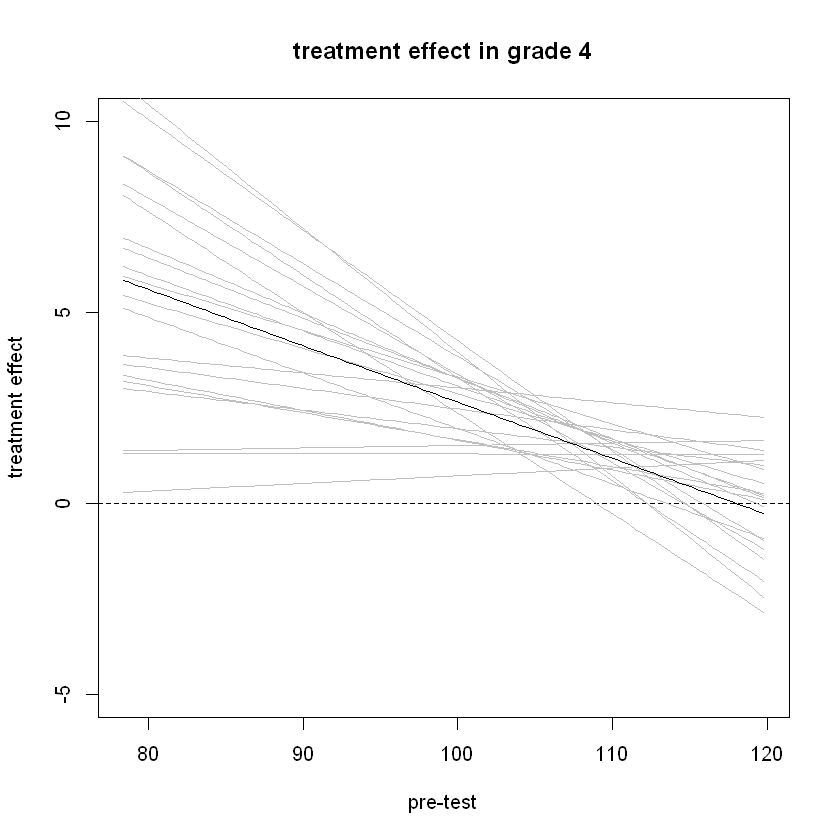

In [11]:
#code taken from gellman and hill et al reading
library(arm)
lm.4 <- lm(sesame$post.test ~ sesame$treatment + sesame$pre.test + sesame$treatment:sesame$pre.test)
lm.4.sim <- sim(lm.4)
plot (0, 0, xlim=range (sesame$pre.test), ylim=c(-5,10),
xlab="pre-test", ylab="treatment effect",
main="treatment effect in grade 4")
abline (0, 0, lwd=.5, lty=2)
#this for loop, the coefficients are written down in part of beta to make the function take coefficient of curve, 20 iterations for different effects
for (i in 1:20){
curve(coef(lm.4.sim)[i,2] + coef(lm.4.sim)[i,4]*x, lwd=.5, col="gray",
add=TRUE)}
curve (coef(lm.4)[2] + coef(lm.4)[4]*x, lwd=.5, add=TRUE)

In [77]:
#Q2
library(arm)
tinting = read.csv(url("https://tinyurl.com/v4bq99k")) #import data

# regression equation
lm1 <- lm(csoa ~ age + sex + target + I(as.numeric(tint != "no")) + I(as.numeric(tint!= "no")*age), data = tinting) 
summary(lm_tint)

# 1000 simulations
iterations <- 1000
sim <- sim(lm1, n.sims = iterations)


Call:
lm(formula = csoa ~ age + sex + target + I(as.numeric(tint != 
    "no")) + I(as.numeric(tint != "no") * age), data = tinting)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.268 -10.518  -1.896   7.244  63.495 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       31.15440    3.43576   9.068 2.35e-16 ***
age                                0.28633    0.06355   4.506 1.20e-05 ***
sexm                               5.48114    2.18666   2.507   0.0131 *  
targetlocon                        3.53675    2.05229   1.723   0.0866 .  
I(as.numeric(tint != "no"))       -0.72172    4.45631  -0.162   0.8715    
I(as.numeric(tint != "no") * age)  0.04237    0.08081   0.524   0.6007    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.51 on 176 degrees of freedom
Multiple R-squared:  0.3359,	Adjusted R-squared:  0.317 
F-statistic:  17.8 on 5 and 176 DF,  p-value: 2.90

In [82]:
#a
# create empty matrix for future use, as well as a list of every age from 20-80 
ages = c(20, 30, 40, 50, 60, 70, 80)
simulated <- matrix(NA, nrow = iterations, length(ages))


for (age in ages) {
  xval <- c(1, age, 0, 1, 1, 1*age) #parameters for intercept, age, sex, hicon, tint!= no
  for (i in 1:iterations) {
    simulated[i, 1 + (age-min(ages))/10] <- sum(xval*sim@coef[i,]) 
  }
}
# table created with our required calculations
confidence1 <- apply(simulated, 2, quantile, probs = c(0.025, 0.975)) #confidence int
mean1 <- apply(simulated, 2, mean) #mean
table1 <- t(data.frame(confidence1))
#name of columns and rows
colnames(table1) <- c("Mean of 2.5th percentile", "Mean of 97.5th percentile")
rownames(table1) <- ages
table.mean


,Mean of 2.5th percentile,Mean of 97.5th percentile
20,36.20086,45.13339
30,39.84933,47.91857
40,43.23349,50.85474
50,46.44225,54.19176
60,49.38777,57.87876
70,52.06950,61.63551
80,54.56417,65.51562


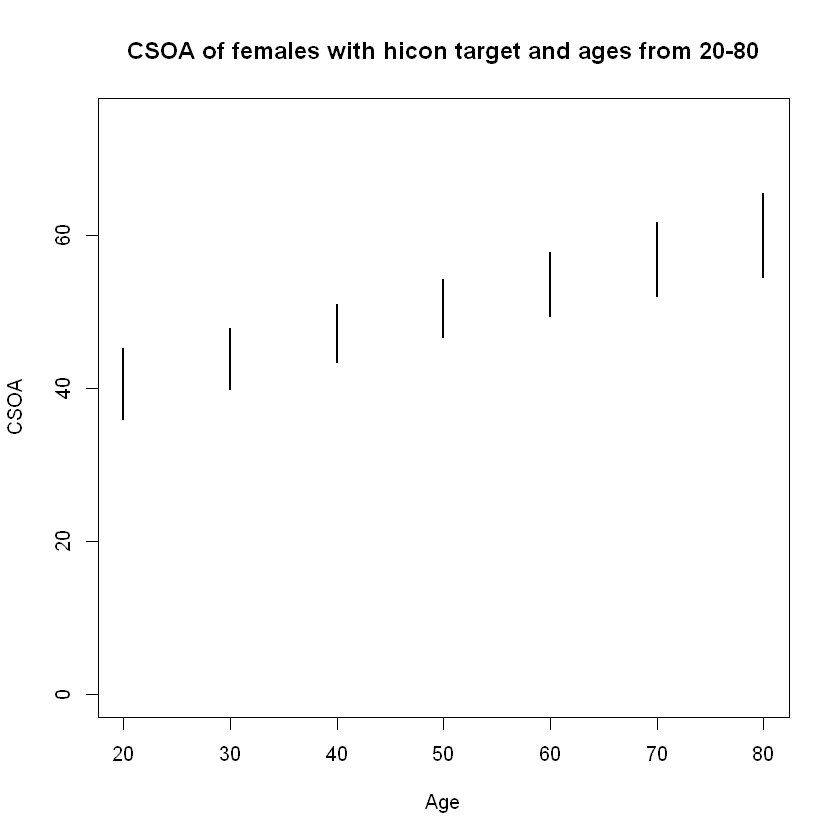

In [83]:
#plotting the graph, x and y bounds set according to table findings
plot(x = c(1:100), y = c(1:100), type = "n", 
xlim = c(20,80),
ylim = c(-0,75), 
main = "CSOA of females with hicon target and ages from 20-80", xlab = "Age", 
ylab = "CSOA")
#intervals created to see the difference of effect
for (age in ages) {
  segments(
x0 = age,
y0 = confidence1[1, ((age - min(ages))/10)+1],
x1 = age,
y1 = confidence1[2, ((age - min(ages))/10)+1],
lwd = 2)
}

In [84]:
# b) #repeating part a but without treatment
ages = c(20, 30, 40, 50, 60, 70, 80)
control <- matrix(NA, nrow = iterations, ncol = length(ages))

#this for loop changes it
for (age in ages) {
  x2 <- c(1, age, 0, 1, 1, 0*age) #again, intercept, age, sex, hicon and tint!= no values are inputted but 0*age here suggests no treatment
  for (i in 1:iterations) {
    control[i, 1 + (age-min(ages))/10] <- sum(x2*sim@coef[i,])
  }
}
#the treatment effect
simulated.effect = simulated - control

treatment.confidence <- apply(simulated.effect, 2, quantile, probs = c(0.025, 0.975))
mean.effect <- apply(simulated.effect, 2, mean)
treatment.table <- t(data.frame(treatment.confidence))
colnames(treatment.table) <- c("Mean of 2.5th percentile", "Mean of 97.5th percentile")
rownames(treatment.table) <- ages
treatment.table



,Mean of 2.5th percentile,Mean of 97.5th percentile
20,-2.374104,4.063196
30,-3.561156,6.094794
40,-4.748208,8.126392
50,-5.935260,10.157990
60,-7.122313,12.189588
70,-8.309365,14.221186
80,-9.496417,16.252784


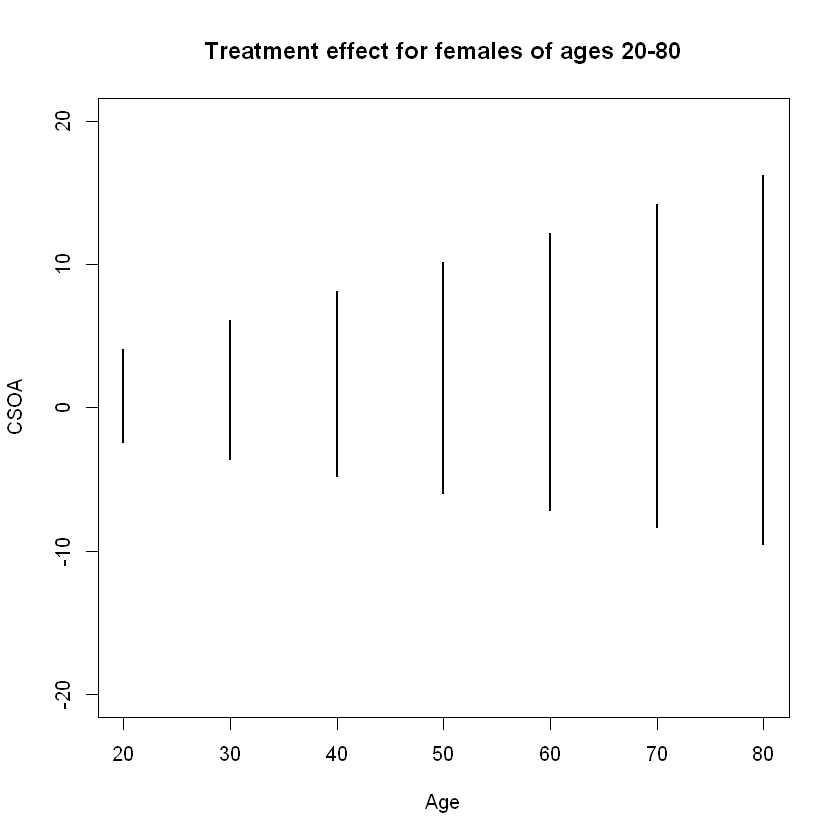

In [85]:
#limits changed due to change in table findings
plot(x = c(1:100), y = c(1:100), type = "n", 
xlim = c(20,80),
ylim = c(-20,20), 
main = "Treatment effect for females of ages 20-80", xlab = "Age", 
ylab = "CSOA")
for (age in ages) {
  segments(
x0 = age,
y0 = treatment.confidence[1, ((age - min(ages))/10)+1],
x1 = age,
y1 = treatment.confidence[2, ((age - min(ages))/10)+1],
lwd = 2)
}

In [86]:
#Q3
#libraries
library(Matching)
data(lalonde)
head(lalonde)
#linear regression
lm1 <- summary(lm(lalonde$re78 ~ lalonde$age, data=lalonde))
lm1
#for loop which is manually coded to calculate rsquare
rsquare <- function(x,y) {
    rss <- sum((x - y) ^ 2)  ## residual sum of squares
    tss <- sum((x - mean(y)) ^ 2)  ## total sum of squares
    return (1 - rss/tss)
}
#predicted Y's calculated from this
y.estimate <- 53.39*lalonde$age + 3946.18
#running code for comparison
summary(lm(lalonde$re78~y.estimate))
rsquare(lalonde$re78,y.estimate)

Warning message:
"package 'Matching' was built under R version 3.6.2"## 
##  Matching (Version 4.9-6, Build Date: 2019-04-07)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##



age,educ,black,hisp,married,nodegr,re74,re75,re78,u74,u75,treat
37,11,1,0,1,1,0,0,9930.05,1,1,1
22,9,0,1,0,1,0,0,3595.89,1,1,1
30,12,1,0,0,0,0,0,24909.50,1,1,1
27,11,1,0,0,1,0,0,7506.15,1,1,1
33,8,1,0,0,1,0,0,289.79,1,1,1
22,9,1,0,0,1,0,0,4056.49,1,1,1



Call:
lm(formula = lalonde$re78 ~ lalonde$age, data = lalonde)

Residuals:
   Min     1Q Median     3Q    Max 
 -6616  -4996  -1579   2817  54867 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3946.18    1167.07   3.381 0.000785 ***
lalonde$age    53.39      44.30   1.205 0.228781    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6628 on 443 degrees of freedom
Multiple R-squared:  0.003268,	Adjusted R-squared:  0.001018 
F-statistic: 1.452 on 1 and 443 DF,  p-value: 0.2288



Call:
lm(formula = lalonde$re78 ~ y.estimate)

Residuals:
   Min     1Q Median     3Q    Max 
 -6616  -4996  -1579   2817  54867 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)   -0.09625 4409.64689   0.000    1.000
y.estimate     1.00003    0.82978   1.205    0.229

Residual standard error: 6628 on 443 degrees of freedom
Multiple R-squared:  0.003268,	Adjusted R-squared:  0.001018 
F-statistic: 1.452 on 1 and 443 DF,  p-value: 0.2288


[1] 0.003267913

year,month,day,studentid,groupna,treatment,caste,round1,round2,class,...,math3,math4,hindi1,hindi2,hindi3,mothedu,fathedu,mothocc,fathocc,land
2003,January,first day,1,42,Caste Revealed,kshatriya,4,8,7,...,NA,NA,NA,NA,NA,5,10,housewife,field,3.00000
2003,January,first day,2,42,Caste Revealed,chamar,4,4,6,...,NA,NA,NA,NA,NA,0,0,housewife,field,0.79781
2003,January,first day,3,42,Caste Revealed,kshatriya,1,1,6,...,NA,NA,NA,NA,NA,10,8,housewife,field,1.60000
2003,January,first day,4,42,Caste Revealed,kshatriya,3,3,6,...,NA,NA,NA,NA,NA,0,8,housewife,field,1.83027
2003,January,first day,5,42,Caste Revealed,chamar,5,8,7,...,NA,NA,NA,NA,NA,0,0,housewife,field+ construction,0.00000
2003,January,first day,6,42,Caste Revealed,chamar,0,0,6,...,NA,NA,NA,NA,NA,6,10,housewife,field,0.00000


,Confidence.interval.of.bootstrap,Regression.interval
2.5%,-0.8461538,-0.2893112
97.5%,0.8461538,0.6752087


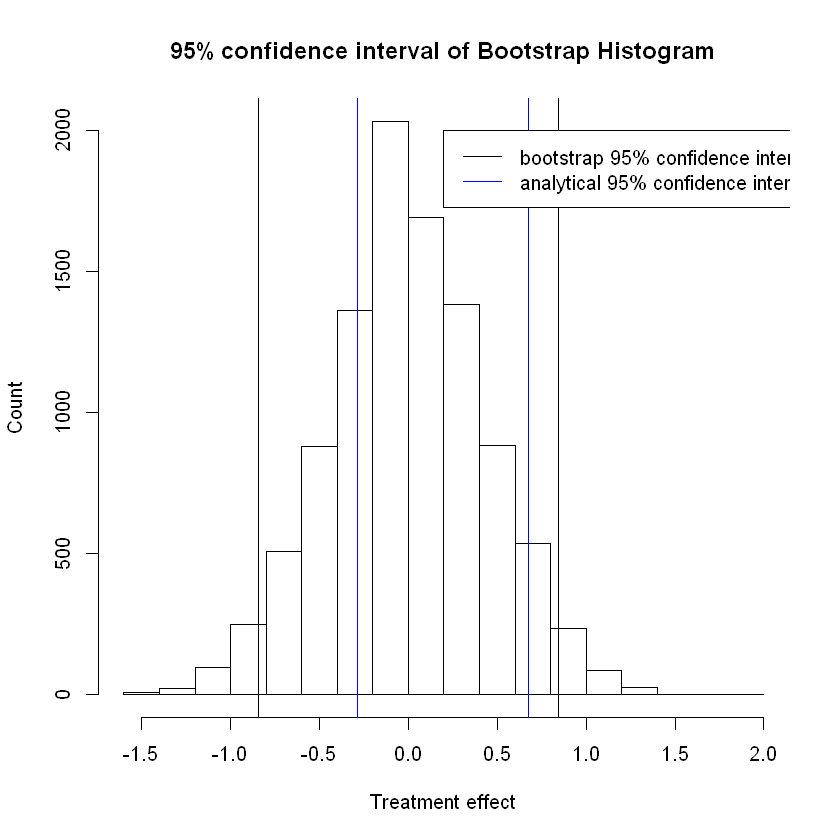

In [100]:
#Q4

library(foreign)
#Loads necessery data set
df = read.dta('C:\\Users\\abdur\\Downloads\\mazedata1.dta')
# head(df)
head(df)

#splitting data into treatment and control
treatment = subset(df, df$treatment == 'Caste Revealed')
control = subset(df, df$treatment != 'Caste Revealed')

#storage vector
storage = c()

iterations = 10000
#bootstraps 10000 time with replacement over the treatment and control groups
for(i in 1:iterations){
    #treatment
    d.treat <- df$round1[sample(length(treatment),length(treatment),replace = TRUE)]
    mean.treat <- mean(d.treat, na.rm = TRUE)
    #control
    d.control <- df$round1[sample(length(control), length(control), replace = TRUE)]
    mean.control <- mean(d.control, na.rm = TRUE)
    storage[i] <- mean.treat - mean.control
}

#95% confidence interval of bootstrapped values
confidence.bootstrap = quantile(storage, probs = c(0.025, 0.975))

#regression model and confint
regression = lm(round1~treatment, data=df)
interval = confint(regression, level = 0.95)[2,]

#table
table = data.frame('Confidence interval of bootstrap'= confidence.bootstrap, 'Regression interval'= interval)
table

#histogram
hist(storage, main="95% confidence interval of Bootstrap Histogram", xlab= "Treatment effect", ylab= "Count")
abline(v=quantile(storage, c(0.025, 0.975)), col="black") #95% confidence interval of bootstrap
abline(v=confint(regression)[2,], col="blue") #95% confidence interval of calculated regression
legend(0.2,2000, legend=c("bootstrap 95% confidence interval","analytical 95% confidence interval"),
       col=c("black","blue"), lty=1:1 )

In [35]:
#Q5
foo <- read.csv(url("https://tinyurl.com/yx8tqf3k"))
set.seed(12345)
test.set.rows <- sample(1:length(foo$age), 2000, replace =
FALSE)
library(boot)

In [40]:
#creating test and training sets
training = foo[-test.set.rows,]
test = foo[test.set.rows,]


In [44]:
#Simple Model
#K Fold
glm.foo <- glm(treat~age, data=training)
cv.err <- cv.glm(training, glm.foo, K=10)
cv.err$delta[1]
#0.0113744576180754

#LOOCV Model
cv.err.2 <- cv.glm(training,glm.foo)
cv.err.2$delta[1]
#0.0113729924309196

[1] 0.01137446

[1] 0.01137299

In [45]:
#Complex Model
#K Fold Model
head(foo)
glm.complex <- glm(treat~.-re78,data=training)
cv.err.complex <- cv.glm(training,glm.complex,K=10)
cv.err.complex$delta[1]
#0.0100038171198922

#LOOCV
cv.error.complex2 <- cv.glm(training,glm.complex)
cv.error.complex2$delta[1]
#0.0100012703147979


treat,age,education,black,hispanic,married,nodegree,re74,re75,re78,u74,u75
1,37,11,1,0,1,1,0,0,9930.0459,TRUE,TRUE
1,22,9,0,1,0,1,0,0,3595.8940,TRUE,TRUE
1,30,12,1,0,0,0,0,0,24909.4492,TRUE,TRUE
1,27,11,1,0,0,1,0,0,7506.1460,TRUE,TRUE
1,33,8,1,0,0,1,0,0,289.7899,TRUE,TRUE
1,22,9,1,0,0,1,0,0,4056.4939,TRUE,TRUE


[1] 0.01000382

[1] 0.01000127

In [47]:
# test MSE from the models
simple.test.mse = mean((test$treat - predict.glm(glm.foo,test))^2)
complex.test.mse = mean((test$treat - predict.glm(glm.complex,test))^2)

simple.test.mse
complex.test.mse
table = data.frame("Simple Models LOOCV and K-Fold"=)

[1] 0.01038182

[1] 0.009124118

In [60]:
# test MSE from the models
simple.test.mse = mean((test$treat - predict.glm(glm.foo,test))^2)
complex.test.mse = mean((test$treat - predict.glm(glm.complex,test))^2)

simple.test.mse
complex.test.mse
table = data.frame('Simple LOOCV'=cv.err.2$delta[1],'Simple K-Fold'=cv.err$delta[1],'Complex LOOCV'=cv.error.complex2$delta[1],
                  'Complex K-fold'=cv.err.complex$delta[1],'Simple MSE'=simple.test.mse,'Complex MSE'=complex.test.mse)
table

[1] 0.01038182

[1] 0.009124118

Simple.LOOCV,Simple.K.Fold,Complex.LOOCV,Complex.K.fold,Simple.MSE,Complex.MSE
0.01137299,0.01137446,0.01000127,0.01000382,0.01038182,0.009124118


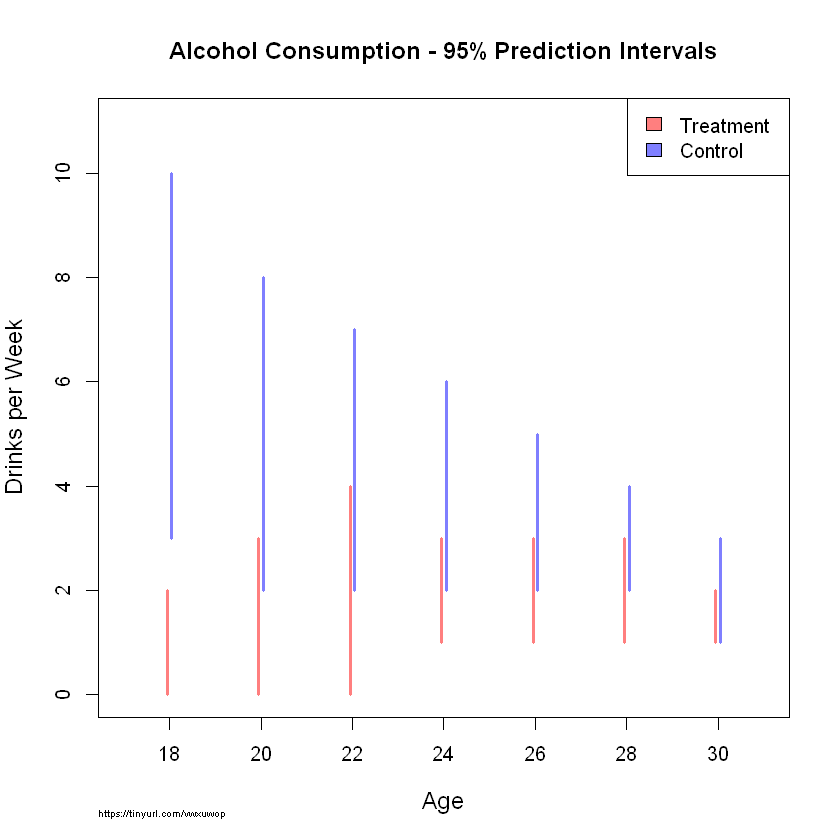

In [1]:
#Q6
trt = matrix(NA,nrow=2,ncol=7)
ctrl = matrix(NA,nrow=2,ncol=7) 

trt[,1]=c(0, 2) #18
ctrl[,1]=c(3, 10)
trt[,2]=c(0, 3) #20
ctrl[,2]=c(2, 8)
trt[,3]=c(0, 4) #22
ctrl[,3]=c(2, 7)
trt[,4]=c(1, 3) #24
ctrl[,4]=c(2, 6)
trt[,5]=c(1, 3) #26
ctrl[,5]=c(2, 5)
trt[,6]=c(1, 3) #28
ctrl[,6]=c(2, 4)
trt[,7]=c(1, 2) #30
ctrl[,7]=c(1, 3)


c1 = rgb(red = 1, green = 0, blue = 0, alpha = 0.5) #trt
c2 = rgb(red = 0, green = 0, blue = 1, alpha = 0.5) #ctrl

plot(x = c(1:100), y = c(1:100), type = "n", xlim = c(17,31), ylim = c(0,11), cex.lab=1.2,
     main = "Alcohol Consumption - 95% Prediction Intervals", xlab = "Age",ylab = "Drinks per Week")

for (age in seq(from=18,to=30,by=2)) { 
  segments(x0 = age-0.05, y0 = trt[1, (age-18)/2+1],
           x1 = age-0.05, y1 = trt[2, (age-18)/2+1],lwd = 3,col=c1)
  
  segments(x0 = age+0.05, y0 = ctrl[1, (age-18)/2+1],
           x1 = age+0.05, y1 = ctrl[2, (age-18)/2+1],lwd = 3,col=c2)
}
legend('topright',legend=c('Treatment','Control'),fill=c(c1,c2))
mtext("https://tinyurl.com/vwxuwop", side = 1, cex = 0.5, adj = 0, padj = 10)